### Seaborn
- 시각화 라이브러리
- https://seaborn.pydata.org/examples/index.html
- 라이브러리 설치 필요
- pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프를 그리기 위한 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 1차원 분포 플롯
- 데이터의 분포를 확인하기 위해서는 산점도(scatter)를 사용한다.
- 산점도는 x축과 y축이 지정되어야 하기 때문에 1차원 데이터는 표현할 수 없다.
- 이에 seaborn에서 1차원 데이터의 분포를 확인할 수 있는 것을 제공한다.

In [5]:
iris = pd.read_csv('data/iris.csv')
iris.columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


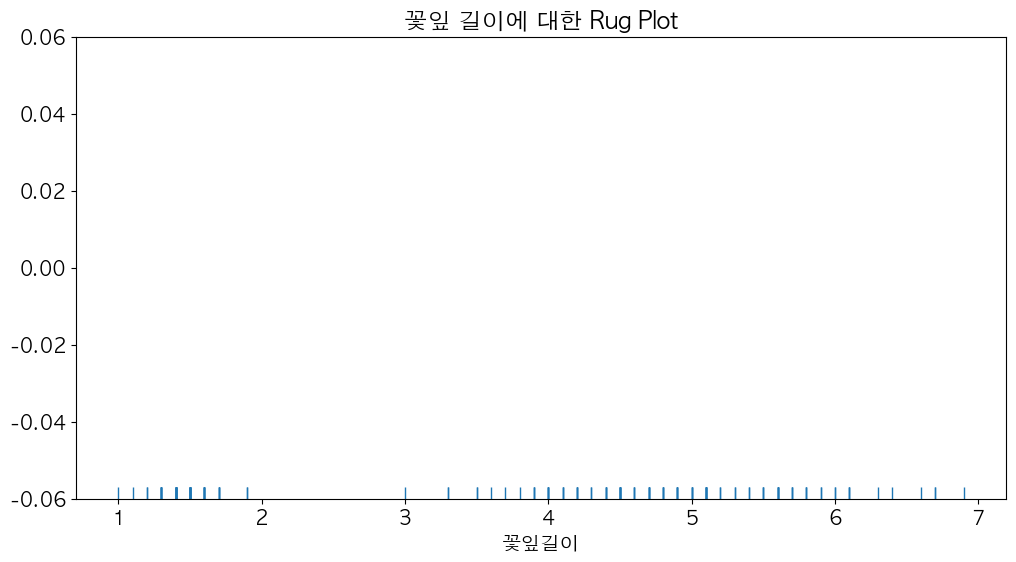

In [6]:
# Rug Plot
# 1차원 데이터에 저장되어 있는 값들의 종류를 확인할 수 있다.
# 각 값들이 얼마나 저장되어 있는지는 확인할 수 없다.
sns.rugplot(iris['꽃잎길이'])
plt.title('꽃잎 길이에 대한 Rug Plot')
plt.show()

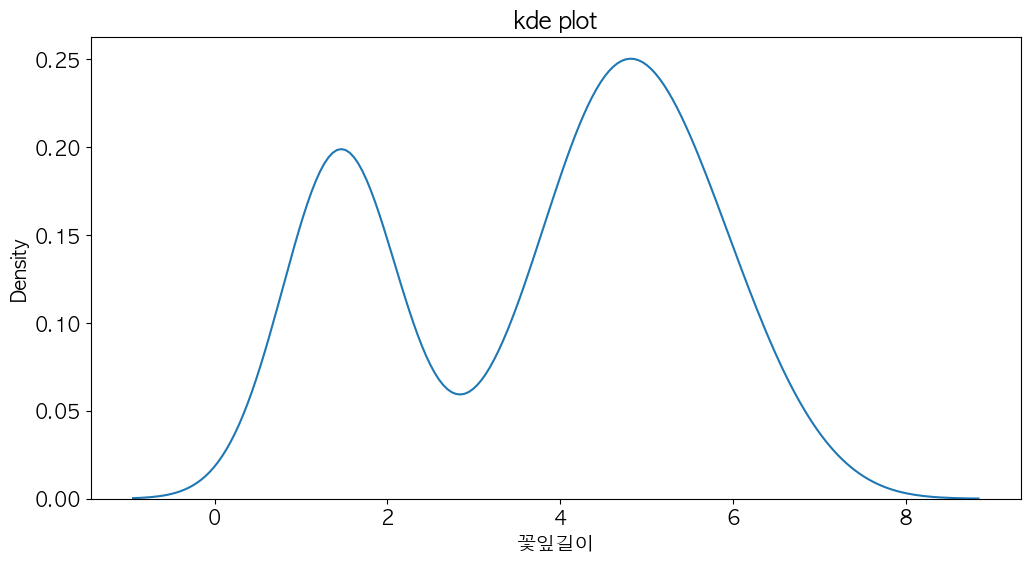

In [7]:
# kde : 히스토그램은 막대 그래프로 값 분포를 표현하지만 kde는 선으로 표현을 한다.
# 막대는 양을 표현하고 kde는 밀도를 표현한다.
sns.kdeplot(iris['꽃잎길이'])
plt.title('kde plot')
plt.show()

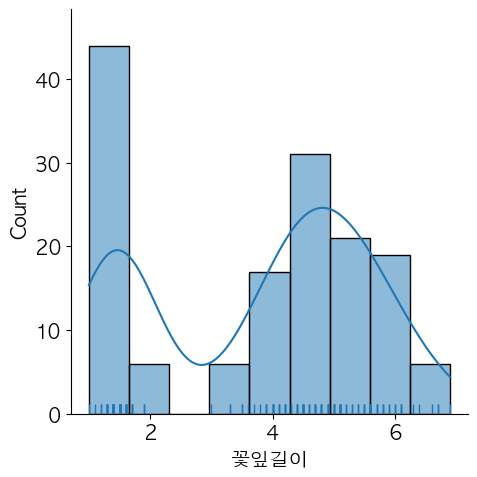

In [8]:
# displot : 히스토그램, Rug, Kde를 같이 표현할 수 있는 그래프
# 옛날 버전에서는 distplot라는 이름의 함수로 제공되었었다.(0.14.0 버전에서 제거될 예정)
sns.displot(iris['꽃잎길이'], rug=True, kde=True)
plt.show()

### 카운트 플롯
- 특정 컬럼의 데이터의 개수를 막대 그래프로 표현한 그래프이다.
- 특정 컬럼의 데이터의 각 종류별로 몇 개씩 저장되어 있는지 확인할 수 있다.

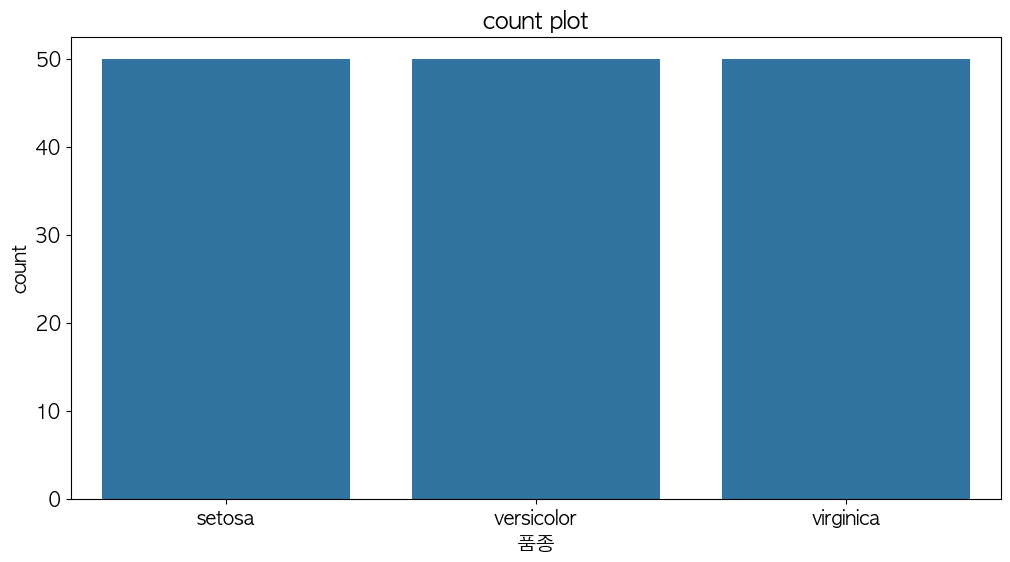

In [9]:
sns.countplot(data=iris, x='품종')
plt.title('count plot')
plt.show()

### 다차원 데이터
- 데이터 변수가 여러 개인 다차원 데이터를 표현할 수 있다.
- 분석하고자 하는 데이터가 모두 범위형인 경우
- 분석하고자 하는 데이터가 모두 범주형인 경우
- 분석하고자 하는 데이터가 범위형과 범주형이 섞여 있을 경우

### 2차원 실수 데이터에 대한 시각화

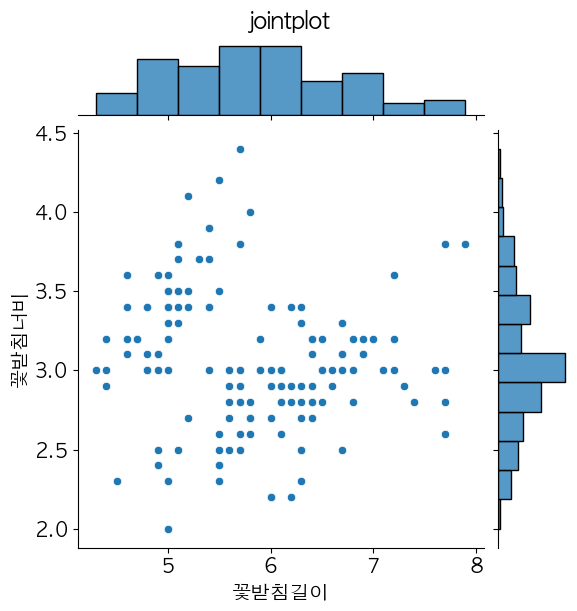

In [11]:
# jointplot : 산점도와 히스토그램을 같이 표현한다.
# 중앙에는 x축과 y축을 이용해 산점도를 표현한다.
# 상단에는 x축의 데이터를 이용한 히스토그램이 표현된다.
# 우측에는 y축의 데이터를 이용한 히스토그램이 표현된다.
sns.jointplot(data=iris, x='꽃받침길이', y='꽃받침너비')
plt.suptitle('jointplot', y=1.02)
plt.show()

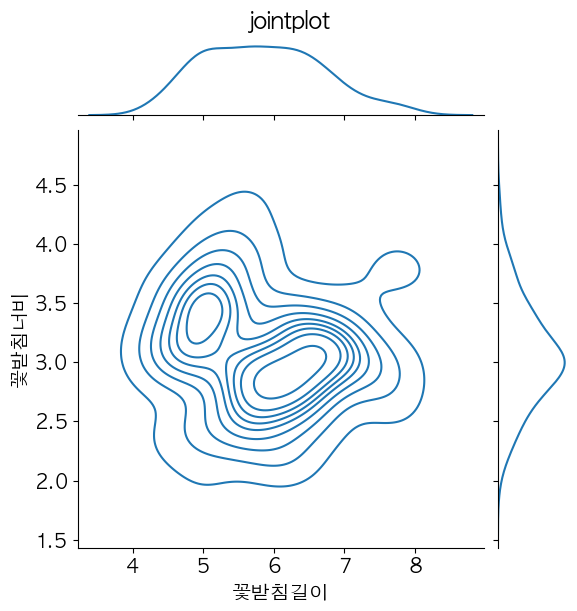

In [12]:
# jointplot의 kind에 kde를 넣어주면 kde 밀도 그래프를 그릴 수 있다.
# 중앙에는 x축과 y축을 이용해 kde를 표현한다.
# 상단에는 x축의 데이터를 이용한 kde를 표현한다.
# 우측에는 y축의 데이터를 이용한 kde를 표현한다.
sns.jointplot(data=iris, x='꽃받침길이', y='꽃받침너비', kind='kde')
plt.suptitle('jointplot', y=1.02)
plt.show()

### PairPlot
- 산점도의 경우에는 2차원 데이터, 즉 컬럼 두 개를 지정하여 표현한다.
- 만약 데이터 프레임의 컬럼이 다 수인 경우 산점도를 그리려면 개발자가 꽤 많은 그래프를 그려야 한다.
- PairPlot은 데이터 프레임의 각 컬럼들을 조합한 산점도를 모두 표현해준다.
- 같은 컬럼의 조합에서는 히스토그램을 그려준다

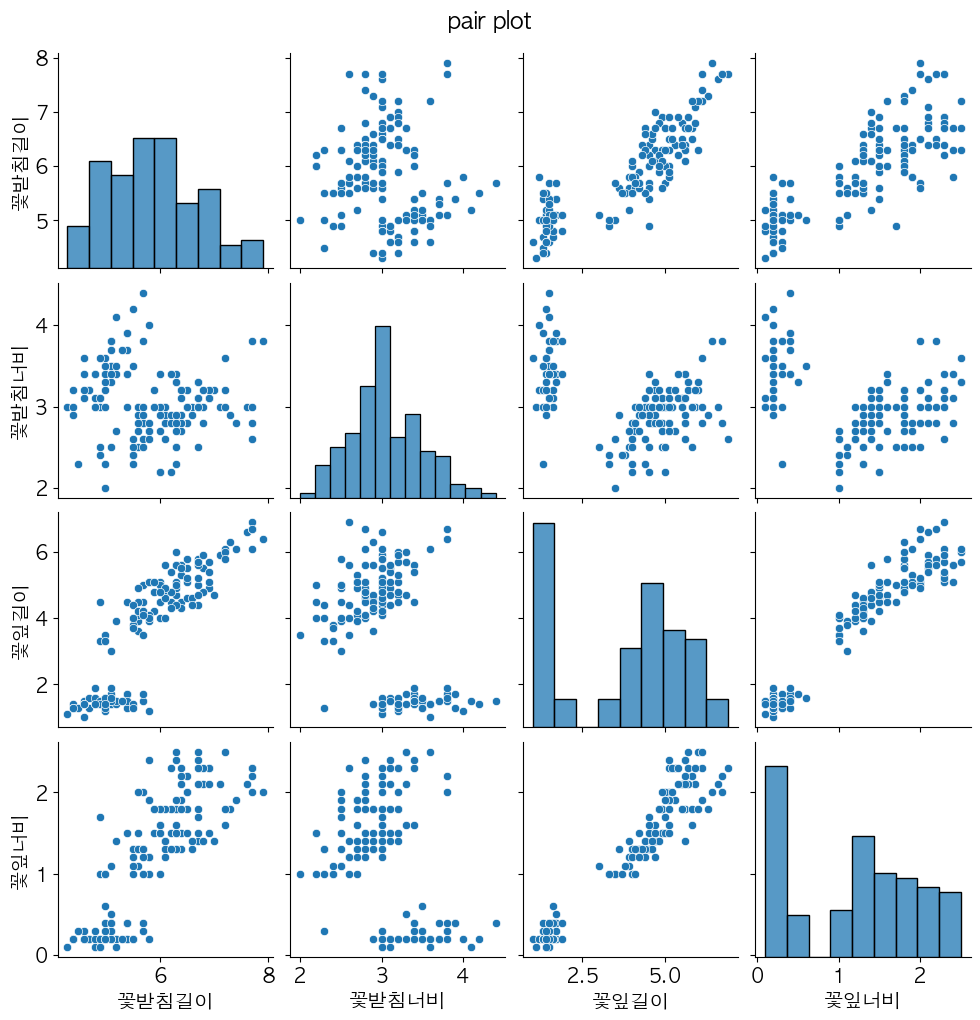

In [13]:
# 수치형 데이터만 모아서 그릴 수 있다.
a1 = iris.drop('품종', axis=1)

sns.pairplot(a1)
plt.suptitle('pair plot', y=1.02)
plt.show()

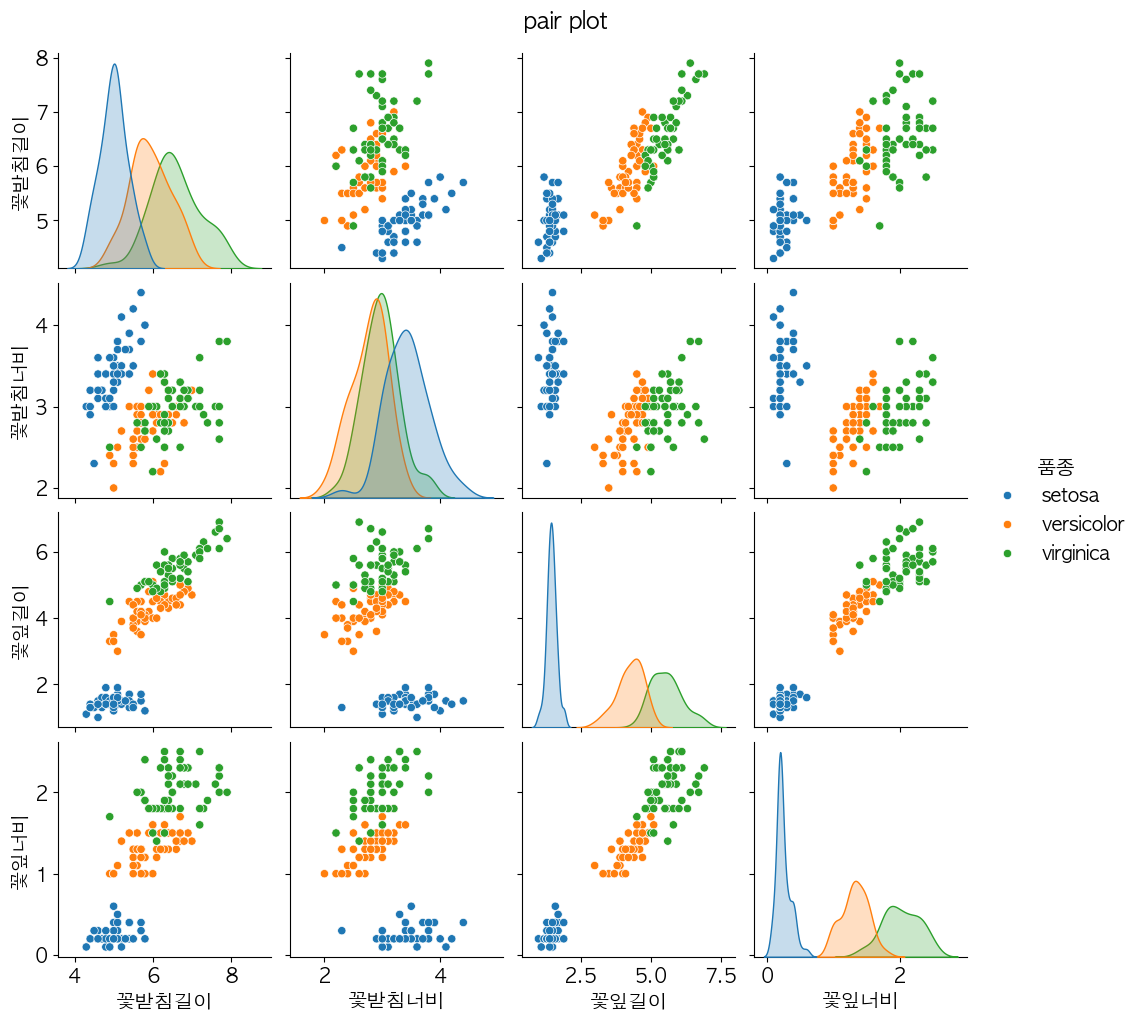

In [14]:
# hue : 각 행들을 구분하기 위한 컬럼을 지정한다.
# 지정한 컬럼의 값에 따라 점의 색상이 달라진다.
# 컬럼명 동일한 부분에는 해당 컬럼에 대해 hue에 지정한 컬럼의 값으로 나눠서 그리기 때문에
# 히스토그램이 아닌 kde로 표현한다.
sns.pairplot(iris, hue='품종')
plt.suptitle('pair plot', y=1.02)
plt.show()

### Heatmap
- 컬럼간의 상관 관계나 데이터의 양을 색상으로 표현해 확인하는 그래프
- 직접 통계값을 구해 그려야 한다.

In [15]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [16]:
# pivot 테이블을 구한다.
# 데이터 프레임의 컬럼 하나를 컬럼으로, 컬럼 하나를 행으로 지정하여 3번째 지정된 겂을 값으로 하는
# 데이터프레임을 생성한다.
# 로우 하나의 데이터를 테이블 형태로 만든 데이터 프레임
# observed 가 True면 지정된 컬럼만 사용하여 pivot table을 만든다.
df = flights.pivot_table(index='month', columns='year', values='passengers', observed=True)
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


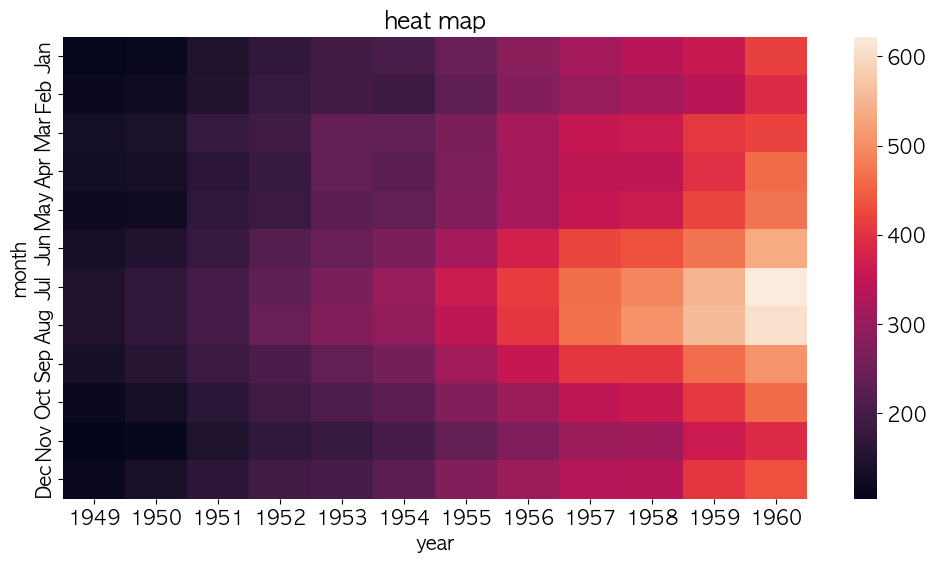

In [17]:
sns.heatmap(df)
plt.title('heat map')
plt.show()

In [18]:
# 피어슨 상관계수를 구한다.
# 피어슨 상관계수는 각 컬럼을 1:1 관계의 조합으로 만든 다음에 변동량에 대한 관게를 수치화 시킨 계수이다.
# 1이나 -1에 가까우면 관계가 매우 높고 0과 가까우면 관계가 매우 낮다.
a1 = iris.drop('품종', axis=1)
a2 = a1.corr()
a2

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
꽃받침길이,1.000000,-0.117570,0.871754,0.817941
꽃받침너비,-0.117570,1.000000,-0.428440,-0.366126
꽃잎길이,0.871754,-0.428440,1.000000,0.962865
꽃잎너비,0.817941,-0.366126,0.962865,1.000000


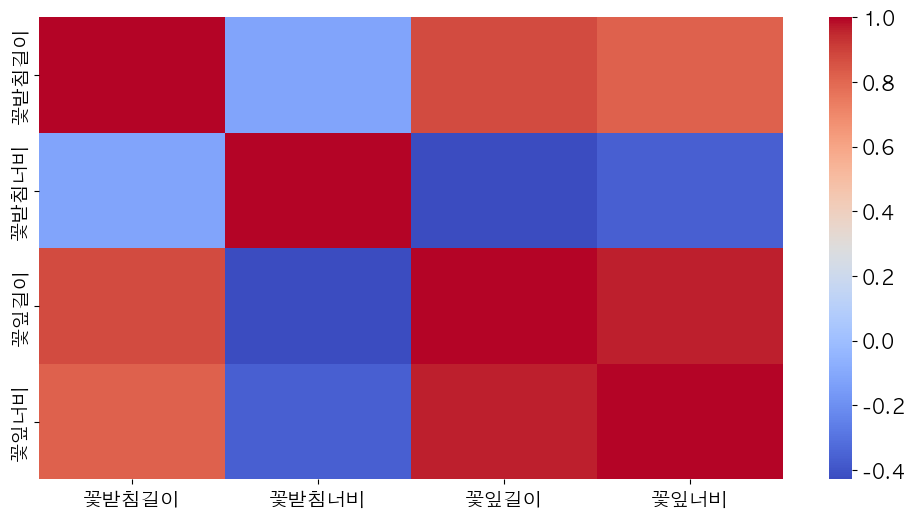

In [19]:
# cmap : 색상을 설정한다.
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.heatmap(a2, cmap='coolwarm')
plt.show()